In [9]:
# -*- coding: utf-8 -*-
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [10]:
inputfile = 'data/water_heater.xlsx' # 输入数据路径，需要使用Excel格式
n = 4 # 使用以后四个点的平均斜率

threshold = pd.Timedelta(minutes = 5) # 专家阈值
data = pd.read_excel(inputfile)
data[u'发生时间'] = pd.to_datetime(data[u'发生时间'], format='%Y%m%d%H%M%S')
data = data[data[u'水流量'] > 0] # 只要流量大于0的记录


In [11]:
def event_num(ts):
    d = data[u'发生时间'].diff() > ts # 相邻时间作差分，比较是否大于阈值
    return d.sum() + 1 # 这样直接返回事件数

In [12]:
dt = [pd.Timedelta(minutes=i) for i in np.arange(1, 9, 0.25)]
h = pd.DataFrame(dt, columns=[u'阈值']) # 定义阈值列
h[u'事件数'] = h[u'阈值'].apply(event_num) # 计算每个阈值对应的事件数
h[u'斜率'] = h[u'事件数'].diff()/0.25 # 计算每两个相邻点对应的斜率
h[u'斜率指标'] = h[u'斜率'].abs().rolling(n).mean() # 采用后n个的斜率绝对值平均作为斜率指标
ts = h[u'阈值'][h[u'斜率指标'].idxmin() - n]
# 注：用idxmin返回最小值的Index，由于rolling_mean()自动计算的是前n个斜率的绝对值平均
# 所以结果要进行平移（-n）

if ts > threshold:
    ts = pd.Timedelta(minutes=4)

C:\Users\20887\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 20107 (\N{CJK UNIFIED IDEOGRAPH-4E8B}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\20887\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 20214 (\N{CJK UNIFIED IDEOGRAPH-4EF6}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\20887\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 25968 (\N{CJK UNIFIED IDEOGRAPH-6570}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\20887\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 38408 (\N{CJK UNIFIED IDEOGRAPH-9608}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\20887\AppData\Local\Programs\Python\Python311\Lib\site-packages

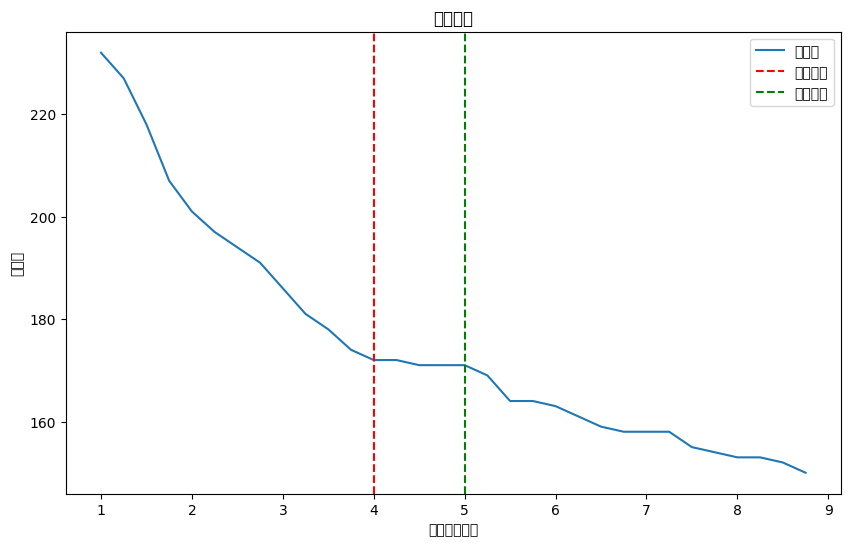

最优阈值: 0 days 00:04:00


In [13]:
# 数据可视化部分
plt.figure(figsize=(10, 6))
plt.plot(h[u'阈值'].dt.total_seconds() / 60, h[u'事件数'], label='事件数')  # 将Timedelta类型转换为分钟单位的数值
plt.xlabel('阈值（分钟）')
plt.ylabel('事件数')
plt.title('阈值寻优')
plt.axvline(x=ts.total_seconds() / 60, color='r', linestyle='--', label='最优阈值')  # 将Timedelta类型转换为分钟单位的数值
plt.axvline(x=threshold.total_seconds() / 60, color='g', linestyle='--', label='专家阈值')  # 将Timedelta类型转换为分钟单位的数值
plt.legend()
plt.show()

print("最优阈值:", ts)
